In [4]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

8272
8274
8269
8276
8275
8276
8275
8277
8269
8274
16609
16611
16611
16619
16615
16605
16614
16615
16616
16619
33141
33148
33141
33144
33147
33142
33148
33140
33148
33140
65268
65280
65275
65265
65275
65265
65269
65278
65276
65264
132034
137698
137703
137690
137711
137711
137699
137701
137704
137695


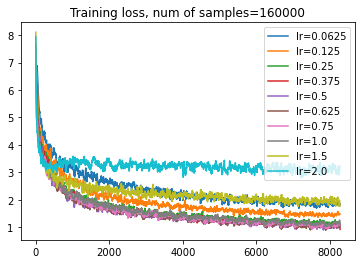

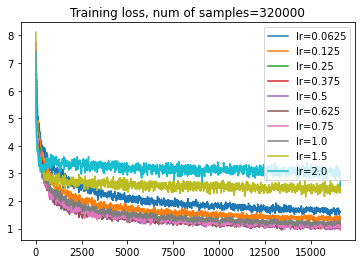

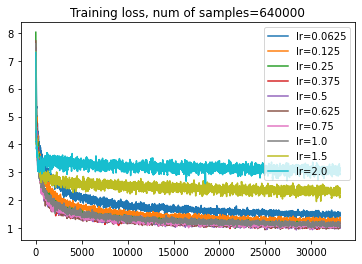

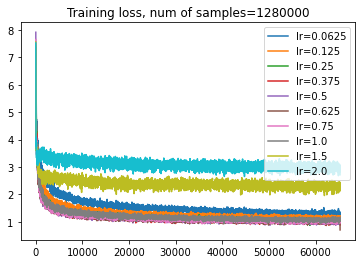

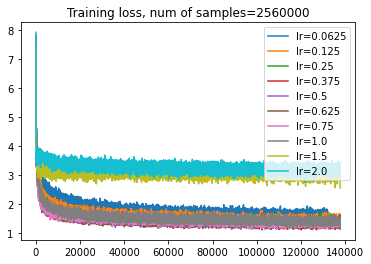

In [7]:
for num_samples in [160000, 320000, 640000, 1280000, 2560000]:

    training_losses = []
    fig, ax = plt.subplots()

    for lr in ['0.0625', '0.125', '0.25', '0.375', '0.5', '0.625', '0.75', '1.0', '1.5', '2.0']:

        folder = f'WMT14_sample{num_samples}_depth8_lr{lr}_dropout0.1'

        training_loss = []
        num_batches = 0

        with open(f'../../checkpoint/NMT_epochs/Simpson/{folder}/log_0.txt', 'r') as f:
            lines = f.readlines()
            for line in lines:
                x = line.split()
                if 'Transformer' in x and 'target' in x and 'global' in x:
                    training_loss.append(float(x[-1]))
                    num_batches += 1

        print(len(training_loss))
        training_loss = savgol_filter(training_loss, 51, 3)
        ax.plot(training_loss, label = f'lr={lr}')

    plt.legend(loc="best")
    plt.title(f'Training loss, num of samples={num_samples}')